# Statistics basics
## Final project
Good news! You are hired by some retail company to analyse transaction statistics in a retail chain. (Sorry, this is just an imaginary company so far, but if you successfully finish our program, I'm sure it will become reality.)

You have to use everything that we learned so far to answer questions that are asked by your employer.

Part of the questions require that you write some code that will be automatically tested with autograding. So when you are finished, please, send this work to automatic grading.

The other part of questions are presented in the appropriate quiz. Answer them using your results.

Finally, some problems will be assessed manually. So, please, submit your notebook to staff graded assignment as well.

Note you are not allowed to use loops anywhere in this project!

Let's begin!

### Data

There are three datasets: `customers.csv`, `purchases.csv` and `shops.csv`. They are stored in `data` folder.

`customers.csv` contains information about each customer registered in loyalty program.

`shops.csv` contains information about shops and special offers they organized. One shap can organize several offers and therefore there are usually several rows that correspond to the same shops. However, some shops do not organize special offers at all, but they are presented in this table nevertheless.

`purchases.csv` is a purchase log. It contains information for all customers, either registered in a loyalty program (in this case we know the corresponding customer id) or not registered. One purchase can be a collection of several items, but we see only the total price of everything bought.

First, let us load these datasets and make a quick glance on them.

### Problem 1 
Load datasets intro variables `customers`, `purchases` and `shops`. Use `pd.read_csv`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, pearsonr

%matplotlib inline

In [2]:
customers = pd.read_csv('https://github.com/mbburova/MDS/raw/main/customers.csv', sep = ',')
purchases = pd.read_csv('https://github.com/mbburova/MDS/raw/main/purchases.csv', sep = ',')
shops = pd.read_csv('https://github.com/mbburova/MDS/raw/main/shops.csv')

### Problem 2 (quiz)

Investigate dataframes and answer the following questions (in the appropriate Quiz):

1. What is the type of variable `customer_id` in the dataset `purchases`?
2. What is the type of variable `age` in the dataset `customers`?

Note that you have to provide your answers based on the meaning of the data, not on the Python object types of the corresponding column.

In [3]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40402 entries, 0 to 40401
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  28799 non-null  float64
 1   date         40402 non-null  object 
 2   shop_id      40402 non-null  int64  
 3   total_price  40402 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ MB


In [4]:
purchases.head()

,customer_id,date,shop_id,total_price
0,0.0,2018-05-04,40,289.673291
1,0.0,2019-01-26,40,1316.898901
2,0.0,2018-11-18,42,159.414367
3,0.0,2018-05-12,42,808.791649
4,0.0,2019-04-20,42,1207.855038


In [5]:
#purchases['customer_id'].unique()  #categorical

In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer id  867 non-null    int64  
 1   age          824 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 13.7 KB


In [7]:
customers.head()

,customer id,age
0,1149,71.0
1,750,21.0
2,428,36.0
3,360,38.0
4,816,51.0


In [8]:
customers['age'].unique() #numeric

array([71., 21., 36., 38., 51., 46., 77., 44., 63., 57., 32., 24., 43.,
       42., 53., 52., nan, 13., 64., 58., 56., 41., 54., 30., 73., 47.,
       27., 45., 61., 26., 35., 31., 48., 23., 25., 28., 67., 19., 72.,
       59., 70., 37., 14., 55., 49., 18., 50., 69., 34., 75., 83., 60.,
       22., 62., 29., 65., 84., 20., 74., 66., 15., 76., 33., 39., 17.,
       68., 40., 16., 85., 79., 12., 82., 78., 80., 81., 87., 88.])

### Problem 3 (SGA)
Let us consider column `total_price` in the dataset `purchases`. May we assume that this column is an i.i.d. sample from some random variable? Write your answer and full explanation in the cell below.


In [9]:
purchases

,customer_id,date,shop_id,total_price
0,0.0,2018-05-04,40,289.673291
1,0.0,2019-01-26,40,1316.898901
2,0.0,2018-11-18,42,159.414367
3,0.0,2018-05-12,42,808.791649
4,0.0,2019-04-20,42,1207.855038
...,...,...,...,...
40397,NaN,2018-05-05,37,169.086474
40398,NaN,2018-09-29,7,310.993395
40399,NaN,2018-10-31,1,17.535630
40400,NaN,2019-02-16,37,218.576020


In [10]:
purchases.groupby('customer_id').count()

,date,shop_id,total_price
customer_id,,,
0.0,18,18,18
2.0,32,32,32
3.0,30,30,30
4.0,23,23,23
5.0,17,17,17
...,...,...,...
1206.0,36,36,36
1207.0,25,25,25
1208.0,16,16,16


*Your explanation here*

#### The rows are not independent due to repeated purchases made by the same customer. Each row in the dataset corresponds to a purchase transaction, and it's possible for multiple rows to share the same customer_id. So the answer is NO

### Problem 4 (quiz)
Visualise distribution of variable `age` in the dataset `customers` using appropriate visualization tool.


<Axes: >

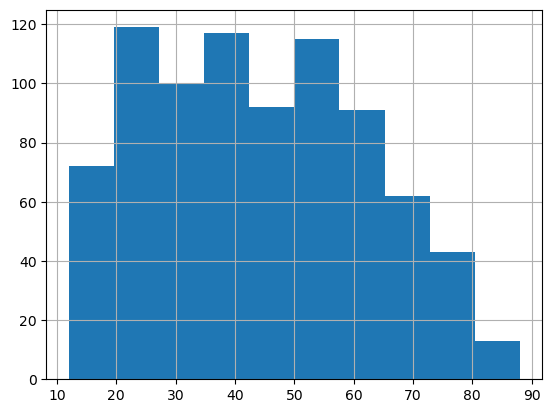

In [11]:
# your code here
customers['age'].hist()

### Problem 5 (quiz)
Your employer is going to provide two special offers for all registered customers based on the customer age. They want to pick some threshold age, and offer one special program to customers who are younger than this threshold age and another special program to customers who are older than this age. They want to choose the threshold in such a way that the number of potential participants of both programs coincide (or at least be as close to each other as possible). What is the threshold?

In [12]:
# your code here
customers['age'].median()

43.0

### Problem 6 (quiz)

Let us visualize how purchases are distributed around a year. For example, it is known that December is a hot month for retail due to Christmas. Will you see it in the data? Are there any other tendencies we will see?

To do it, we have to extract a month from the `date` variable of `purchases` table and create a new variable (new dataframe column) that contains this month, then plot distribution of this variable. There is a special data type in pandas to represent date and time. However, by default `pd.read_csv` does not try to guess that a particular column contains something that looks like a date and reads it just as a column of strings. So let's convert this column manually using function `pd.to_datetime` first:


In [13]:
purchases["date"] = pd.to_datetime(purchases["date"])

Let's check that `date` has correct `dtype`:

In [14]:
purchases["date"].dtype

dtype('<M8[ns]')

This should return something like `dtype('datetime64[ns]')` or `dtype('<M8[ns]')`. It is much easier to work with dates when they are converted to native datetime format instead of strings. For example, you can find the difference between two dates and do a lot of other things. To extract different features of date like month of even day of week, one can use `.dt` accessor (similar to using `.str` accessor to access string methods), see [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components) for details. For example, this is how we can extract day of week (Monday=0, Sunday=6):

In [15]:
purchases["date"].dt.dayofweek

0        4
1        5
2        6
3        5
4        5
        ..
40397    5
40398    5
40399    2
40400    5
40401    5
Name: date, Length: 40402, dtype: int32

Now let us return to our problem here. We want to make a plot that shows how many purchases we have per month. In other words, we want to create and consider new variable `month`. This is a categorical variable. Use an appropriate tool to visualize it.

Make this bar plot. 

**Hint.** To sort the values on the horizontal axis one can use `.sort_index()`.


In [16]:
# your code here
purchases["month"] = purchases["date"].dt.month
purchases

,customer_id,date,shop_id,total_price,month
0,0.0,2018-05-04,40,289.673291,5
1,0.0,2019-01-26,40,1316.898901,1
2,0.0,2018-11-18,42,159.414367,11
3,0.0,2018-05-12,42,808.791649,5
4,0.0,2019-04-20,42,1207.855038,4
...,...,...,...,...,...
40397,NaN,2018-05-05,37,169.086474,5
40398,NaN,2018-09-29,7,310.993395,9
40399,NaN,2018-10-31,1,17.535630,10
40400,NaN,2019-02-16,37,218.576020,2


In [17]:
purchs_per_month = purchases[['month', 'total_price']].groupby(['month'])
purchs_per_month.count().sort_index()

,total_price
month,
1,2688
2,2710
3,3252
4,2790
5,6717
6,3473
7,2817
8,3000
9,2987


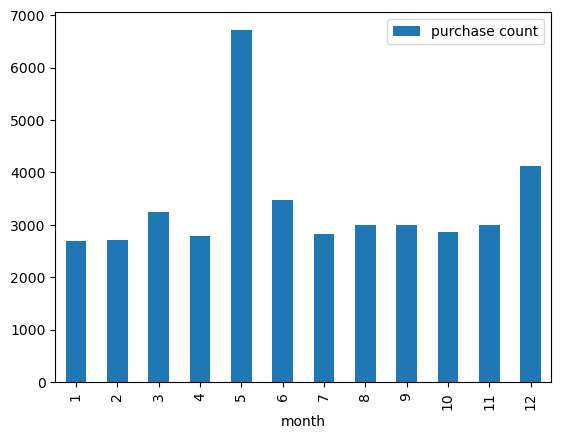

In [18]:
purchs_per_month.count().sort_index().plot(kind='bar')
plt.legend(['purchase count'])

### Problem 7 (SGA)

What's wrong with May? Why do we have so many purchases? Are there any unknown holidays in this month? Or it's some other reason? Investigate your data and give an answer. Write it in the cell below. Add new cells to include code / explanations as necessary.

In [19]:
# Your code here
purchases["year"] = purchases["date"].dt.year
purchases

,customer_id,date,shop_id,total_price,month,year
0,0.0,2018-05-04,40,289.673291,5,2018
1,0.0,2019-01-26,40,1316.898901,1,2019
2,0.0,2018-11-18,42,159.414367,11,2018
3,0.0,2018-05-12,42,808.791649,5,2018
4,0.0,2019-04-20,42,1207.855038,4,2019
...,...,...,...,...,...,...
40397,NaN,2018-05-05,37,169.086474,5,2018
40398,NaN,2018-09-29,7,310.993395,9,2018
40399,NaN,2018-10-31,1,17.535630,10,2018
40400,NaN,2019-02-16,37,218.576020,2,2019


In [20]:
purchases['year'].unique()

array([2018, 2019])

In [21]:
purchases.groupby(['month','year']).count()

customer_id  date  shop_id  total_price
month year                                         
1     2019         1902  2688     2688         2688
2     2019         1952  2710     2710         2710
3     2019         2356  3252     3252         3252
4     2019         1979  2790     2790         2790
5     2018         2688  3756     3756         3756
      2019         2103  2961     2961         2961
6     2018         2202  3102     3102         3102
      2019          256   371      371          371
7     2018         1979  2817     2817         2817
8     2018         2130  3000     3000         3000
9     2018         2169  2987     2987         2987
10    2018         2059  2863     2863         2863
11    2018         2117  2991     2991         2991
12    2018         2907  4114     4114         4114

*Your explanation here*

#### The increase in purchases in May isn't because of a holiday but because we combined data from May (and June) in both 2018 and 2019 into a single month, causing higher purchase numbers.

### Problem 8 (quiz)
We see that people go to shop more often in December. But do they spend more per each visit? Let us draw a bar plot that shows the average purchase total price per month of year. Use `groupby` with the `month` variable you (hopefully) created earlier.

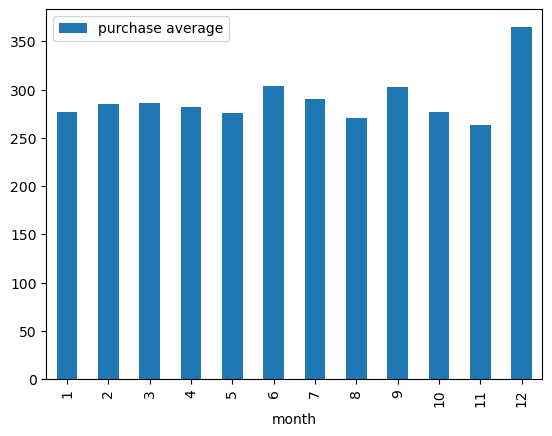

In [22]:
# your code here
purchs_per_month.total_price.mean().plot(kind='bar')
plt.legend(['purchase average'])

### Problem 9 (quiz)
Okay, we see that there is a difference between December's mean purchase price and other month's. But we also see that the average price is different in different months (not including December), probably due to some random factors. Is it possible that December behaviour is just a result of fluke? To answer this question, let us compare two months, for example, December and November, in a statistically rigorous way.

To do so, let us find the average purchase price in each month in each shop (hint: use `.pivot_table`), then extract two samples: one contains average purchase prices in December and another in November. The number of elements in each sample should be equal to the number of shops. Is it true that they are different? Use the statistical test that suits this problem the best with a two-sided alternative. Then answer the question in a quiz.


In [23]:
# your code here
avg_purchase = purchases.pivot_table(index='shop_id',
                                     columns='month',
                                     values='total_price')
avg_purchase

month,1,2,3,4,5,6,7,8,9,10,11,12
shop_id,,,,,,,,,,,,
0,241.562998,314.270412,274.773667,230.820436,250.730568,238.211430,221.974969,380.817517,202.732809,215.609940,229.031047,243.490975
1,236.556164,254.493568,299.033804,228.304553,241.377432,323.394203,195.882800,285.677709,348.547684,222.506663,273.595408,307.988105
2,308.798295,231.334199,323.211837,219.856615,316.690753,358.675216,330.125013,303.952729,303.031873,324.696900,224.476430,377.453485
3,216.317606,177.618519,234.242599,273.430201,217.868408,185.328783,252.006970,210.166147,264.205183,253.669255,219.825518,250.578623
4,191.243990,197.177004,214.254871,233.296251,198.197231,222.441290,202.779374,226.947582,291.576405,258.665440,205.284412,216.818569
...,...,...,...,...,...,...,...,...,...,...,...,...
70,219.804465,315.348001,230.070683,261.674386,316.094971,339.830831,297.537198,209.929063,262.053281,250.032964,202.900924,392.298768
71,400.941187,357.664963,416.915607,458.516293,422.840493,369.427644,443.242101,325.889292,499.793410,361.083542,376.025772,529.627675
72,244.358678,242.730189,232.187133,381.235919,281.941734,296.359413,274.835678,226.983419,252.955604,238.292751,247.884335,305.593160


In [24]:
november_avg_purchase = avg_purchase[11]
december_avg_purchase = avg_purchase[12]

In [25]:
diff = december_avg_purchase - november_avg_purchase
ttest_1samp(diff,0) # rounded to 12. 
#The p-value is far below the significance level, indicating strong evidence against the null hypothesis

TtestResult(statistic=12.130046456676514, pvalue=2.8875117936923646e-19, df=74)

### Problem 10 (autograded)

Now let us investigate customer behaviour. First of all we are interested in the relation between customers' age and their spendings per each purchase. To study this relation, first join tables `purchases` and `customers` in such a way to obtain information on customer's age for each purchase. Call the resulting table `purchases_c`. This table should contain all purchases by the registered customers, but rows that correspond to unregistered customers (not present in `customers`) should be dropped. The resulting table also should contain column `customer_id`.

In [26]:
# your code here
purchases_c = pd.merge(purchases, customers, left_on=["customer_id"], right_on=["customer id"], how="right")
purchases_c

,customer_id,date,shop_id,total_price,month,year,customer id,age
0,1149.0,2019-05-15,60,40.143994,5,2019,1149,71.0
1,1149.0,2018-06-14,60,307.206163,6,2018,1149,71.0
2,1149.0,2018-09-23,4,1327.170365,9,2018,1149,71.0
3,1149.0,2018-07-04,22,151.766925,7,2018,1149,71.0
4,1149.0,2018-09-20,60,140.601729,9,2018,1149,71.0
...,...,...,...,...,...,...,...,...
28794,562.0,2019-05-11,74,592.305574,5,2019,562,22.0
28795,562.0,2018-12-08,74,232.074279,12,2018,562,22.0
28796,562.0,2018-12-16,74,1075.034721,12,2018,562,22.0
28797,562.0,2018-11-04,29,431.440952,11,2018,562,22.0


In [27]:
assert (
    purchases_c[lambda x: x["customer_id"] == 123]["age"]
    == customers.set_index("customer id").loc[123]["age"]
).all()
assert (
    purchases_c[lambda x: x["customer_id"] == 12]["age"]
    == customers.set_index("customer id").loc[12]["age"]
).all()
assert sum(purchases_c["customer_id"]) == 17548008.0

### Problem 11 (autograded)

In [28]:
purchases_c

,customer_id,date,shop_id,total_price,month,year,customer id,age
0,1149.0,2019-05-15,60,40.143994,5,2019,1149,71.0
1,1149.0,2018-06-14,60,307.206163,6,2018,1149,71.0
2,1149.0,2018-09-23,4,1327.170365,9,2018,1149,71.0
3,1149.0,2018-07-04,22,151.766925,7,2018,1149,71.0
4,1149.0,2018-09-20,60,140.601729,9,2018,1149,71.0
...,...,...,...,...,...,...,...,...
28794,562.0,2019-05-11,74,592.305574,5,2019,562,22.0
28795,562.0,2018-12-08,74,232.074279,12,2018,562,22.0
28796,562.0,2018-12-16,74,1075.034721,12,2018,562,22.0
28797,562.0,2018-11-04,29,431.440952,11,2018,562,22.0


To visualize the relation between customer's age and their spendings, we have to transform our table in such a way that one observation (row) corresponds to one customer. Let us do it by groupping and aggregating. Transform table `purchases_c` to find average `total_price` for each customer and keep column `age`. Indexes of the new dataframe should be customer id's. Put the resulting dataframe to variable `purchases_c_mean`.


In [29]:
# your code here
purchases_c_mean = purchases_c[['customer_id', 'age', 'total_price']].groupby(['customer_id']).mean()

In [30]:
purchases_c_mean

,age,total_price
customer_id,,
0.0,38.0,711.291471
2.0,60.0,380.286822
3.0,NaN,392.825462
4.0,24.0,349.189551
5.0,24.0,472.189806
...,...,...
1206.0,57.0,251.489294
1207.0,42.0,525.552619
1208.0,31.0,640.826988


In [31]:
assert (
    round(purchases_c_mean.loc[12]["total_price"] - purchases_c.query("customer_id == 12")["total_price"].mean(), 6) == 0
)
assert (
    purchases_c_mean.loc[125]["total_price"]
    == purchases_c.query("customer_id == 125")["total_price"].mean()
)

### Problem 12 (quiz)
Use dataframe `purchases_c_mean` to visualize the relation between customer's `age` (horizontal axis) and their average `total_price` (vertical axis).

<Axes: xlabel='age', ylabel='total_price'>

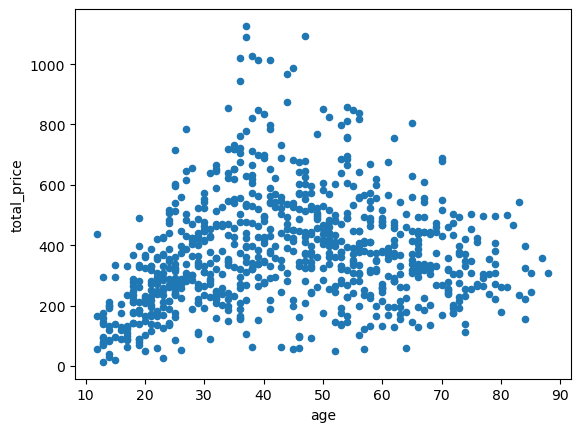

In [32]:
# your code here
purchases_c_mean.plot.scatter(x='age', y='total_price')

### Problem 13 (quiz)
Find Pearson's correlation coefficient between age and total price.

In [33]:
# your code here
purchases_c_mean.corr(method='pearson')

,age,total_price
age,1.000000,0.165395
total_price,0.165395,1.000000


### Problem 14 (quiz)
We found correlation in the data present on the previous step and made some conclusions based on this data. However, we have to make sure that we can generalize our conclusion to the corresponding population. To do it, let us perform a statistical test of the significance of correlation. This can be done with `scipy.stats.pearsonr`. However, our data contains `NaN`'s in column `age` (there are registered customers with unknown age). Use method `.dropna()` to remove such rows from the dataset, then perform statistical testing with `pearsonr`. This function returns a two-tuple: first value is correlation coefficient and the second is p-value that corresponds to a test where the null hypothesis is that the correlation in population is zero.

In [34]:
# your code here
purchases_c_mean.dropna(inplace=True)
pearsonr(purchases_c_mean['age'], purchases_c_mean['total_price'])

PearsonRResult(statistic=0.16539508120771906, pvalue=1.8110789103295103e-06)

### Problem 15 (autograded)
Now we are going to do the main investigation. We want to understand how special offers in our shops affect customers' behaviour. To do it, we have to identify those purchases that are made during special offers. This can be a bit tricky: for each purchase we know its date and shop id. For each shop we also know the dates of all special offers (there can be several). So for each purchase we have to compare its date with dates of all offers that took place in the corresponding shop.

As a first step, let us try to join `purchases_c` with `shops`. Name this table `full_df_preliminary`.

In [35]:
# your code here
full_df_preliminary = pd.merge(purchases_c, shops, how="left")

In [36]:
assert (
    full_df_preliminary.query('date == "2019-04-24" and customer_id == 555.0')[
        "offer_begin"
    ].iloc[0]
    == "2018-08-15"
)
assert (
    full_df_preliminary.query('date == "2018-08-24" and customer_id == 686.0').max()[
        "offer_end"
    ]
    == "2019-01-21"
)

### Problem 16 (autograded)
Let us investigate the table `full_df_preliminary`. Each row of this table corresponds to some purchase. However, for some shops we have several special offers and therefore several rows in the table `shops`. During the join each purchase is joined to all rows of `shops` that correspond to a particular shop. Therefore, purchases are duplicated, and we lost information on which rows in `full_df_preliminary` correspond to which purchase. (For example, the last two rows seem to correspond to the same purchase, but can we be sure?) This is due to the fact that table `purchases_c` don't have any explicit column with purchase identifier. Let us add it. As each row of `purchases_c` corresponds to exactly one purchase, table index can work as such an identifier. To create a column that coincides with the index one can use method `.reset_index()`.

Apply `.reset_index()` to `purchases_c`, then repeat the join from the previous problem. Name the resulting dataframe `full_df`.

In [37]:
# your code here
full_df = purchases_c.reset_index().merge(shops, on='shop_id', how='left')

In [38]:
assert (
    full_df.query("index == 1207")
    .iloc[0][["customer_id", "date", "shop_id", "total_price"]]
    .equals(purchases_c.loc[1207][["customer_id", "date", "shop_id", "total_price"]])
)

### Problem 17 (autograded)
Now we need to check for each purchase, did it happen during any of the special offers or not. In the dataset `full_df`, each row relates some purchase with some special offer that happened in the same shop as a purchase. Let us check, is it true that this purchase happened during the corresponding offer? Add a column `offer` that contains values `True` or `False` that answer this question. To do so, we have to compare the value in column `date` with values in columns `offer_begin` and `offer_end`. Let us assume that `offer_end` is the last day of the offer (so the offer still holds during this day). Name the corresponding dataframe `full_df_offer`. Note that you can compare between dates, but not between dates and strings. Convert your data appropriately.


In [39]:
# your code here
full_df_offer = full_df
full_df_offer["offer_begin"] = pd.to_datetime(full_df["offer_begin"])
full_df_offer["offer_end"] = pd.to_datetime(full_df["offer_end"])
full_df_offer['offer'] = (full_df_offer['date'] >= full_df_offer['offer_begin']) & (full_df_offer['date'] <= full_df_offer['offer_end'])
full_df_offer

,index,customer_id,date,shop_id,total_price,month,year,customer id,age,offer_begin,offer_end,offer
0,0,1149.0,2019-05-15,60,40.143994,5,2019,1149,71.0,2018-07-07,2018-08-02,False
1,1,1149.0,2018-06-14,60,307.206163,6,2018,1149,71.0,2018-07-07,2018-08-02,False
2,2,1149.0,2018-09-23,4,1327.170365,9,2018,1149,71.0,2018-08-28,2018-09-28,True
3,2,1149.0,2018-09-23,4,1327.170365,9,2018,1149,71.0,2018-08-28,2018-09-04,False
4,3,1149.0,2018-07-04,22,151.766925,7,2018,1149,71.0,2019-01-14,2019-02-12,False
...,...,...,...,...,...,...,...,...,...,...,...,...
69403,28796,562.0,2018-12-16,74,1075.034721,12,2018,562,22.0,2018-09-14,2018-10-12,False
69404,28796,562.0,2018-12-16,74,1075.034721,12,2018,562,22.0,2018-12-08,2019-01-10,True
69405,28796,562.0,2018-12-16,74,1075.034721,12,2018,562,22.0,2018-08-22,2018-08-28,False
69406,28797,562.0,2018-11-04,29,431.440952,11,2018,562,22.0,2018-05-26,2018-06-21,False


In [40]:
from itertools import islice

for _, row in islice(full_df_offer.iterrows(), 0, 1000):
    assert (
        (pd.to_datetime(row["date"]) >= pd.to_datetime(row["offer_begin"]))
        & (pd.to_datetime(row["date"]) <= pd.to_datetime(row["offer_end"]))
    ) == row["offer"]

### Almost here
Now we have a table that contains information on whether a particular purchase happened during a particular special offer. What we need is a new table that contains information on whether a particular purchase happened during *any* relevant special offer. This can be done by grouping and aggregating. Basically, we need to group our table by column `index` that contains a purchase identifier and apply a special aggregation function `any` to column `offer`. This function checks if there is any `True` element in a group and returns `True` in this case, otherwise (everything is `False`) it returns false. Also, we have to keep all other columns that are related to purchases as is. They are duplicated in the group, so we can just get the first value. This is done by the aggregation function `first`. To apply these functions to different columns, we have to pass a dictionary to method `.agg`. Let's see what's happening.


In [41]:
purchases_offer = full_df_offer.groupby("index").agg(
    {
        "customer_id": "first",
        "date": "first",
        "shop_id": "first",
        "total_price": "first",
        "month": "first",
        "age": "first",
        "offer": "any",
    }
)
purchases_offer

,customer_id,date,shop_id,total_price,month,age,offer
index,,,,,,,
0,1149.0,2019-05-15,60,40.143994,5,71.0,False
1,1149.0,2018-06-14,60,307.206163,6,71.0,False
2,1149.0,2018-09-23,4,1327.170365,9,71.0,True
3,1149.0,2018-07-04,22,151.766925,7,71.0,False
4,1149.0,2018-09-20,60,140.601729,9,71.0,False
...,...,...,...,...,...,...,...
28794,562.0,2019-05-11,74,592.305574,5,22.0,False
28795,562.0,2018-12-08,74,232.074279,12,22.0,True
28796,562.0,2018-12-16,74,1075.034721,12,22.0,True


### Problem 18 (quiz)
Do people tend to spend more money when they make a purchase during a special offer? Let's check it!

First of all, we know that during December people spend more money in shops due to holidays and at the time shops usually announce more special offers during December. As we are interested in the effect of special offers alone, let us remove all purchases that happened during December.

Then create a table which rows are customers that contains two columns: in one column we have average of all prices of purchases that were made during special offers, and in the second the same for purchases that were not made during special offers. Drop all rows that contain `NaN`'s. Then apply an appropriate statistical test to check if there is any statistically significant difference between these columns. Use two-sided alternative.




In [42]:
# your code here
purchases_offer.drop(purchases_offer[purchases_offer['month'] == 12].index, inplace=True)
res = pd.pivot_table(purchases_offer,
                     aggfunc = 'mean',
                     values='total_price',
                     index='customer_id',
                     columns='offer')

In [43]:
res

offer,False,True
customer_id,,
0.0,685.331168,901.935686
2.0,389.216152,318.049544
3.0,311.611398,551.356873
4.0,347.161530,325.092632
5.0,487.628759,279.079141
...,...,...
1206.0,240.058252,245.374937
1207.0,413.785779,941.025534
1208.0,542.108836,683.695119


In [44]:
res = res.dropna()

In [45]:
res = pd.DataFrame(res.to_records())
res

,customer_id,False,True
0,0.0,685.331168,901.935686
1,2.0,389.216152,318.049544
2,3.0,311.611398,551.356873
3,4.0,347.161530,325.092632
4,5.0,487.628759,279.079141
...,...,...,...
730,1206.0,240.058252,245.374937
731,1207.0,413.785779,941.025534
732,1208.0,542.108836,683.695119
733,1210.0,265.196887,397.319089


In [46]:
sample_true = res['True']
sample_false = res['False']
diff = sample_true - sample_false

ttest_1samp(diff, 0)

TtestResult(statistic=16.682645056499567, pvalue=3.221672499502215e-53, df=734)